#Homework 1 Part 2: PyTorch

  1. **Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1**

In [28]:
import pandas as pd


file_path = 'diabetes.csv'

# Load the dataset without headers
data = pd.read_csv(file_path, header=None)

# Add headers to the dataframe
headers = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'label']
data.columns = headers


print(data.head())


   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  label  
0 -0.033333      0  
1 -0.666667      1  
2 -0.633333      0  
3  0.000000      1  
4 -0.600000      0  


2. **Preprocessing Steps**

In [29]:

print(data.head())

# 1. Handling Missing Values
# Check for missing values
print(data.isnull().sum())

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  label  
0 -0.033333      0  
1 -0.666667      1  
2 -0.633333      0  
3  0.000000      1  
4 -0.600000      0  
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
label       0
dtype: int64


##Data Visualization

<Figure size 1000x600 with 0 Axes>

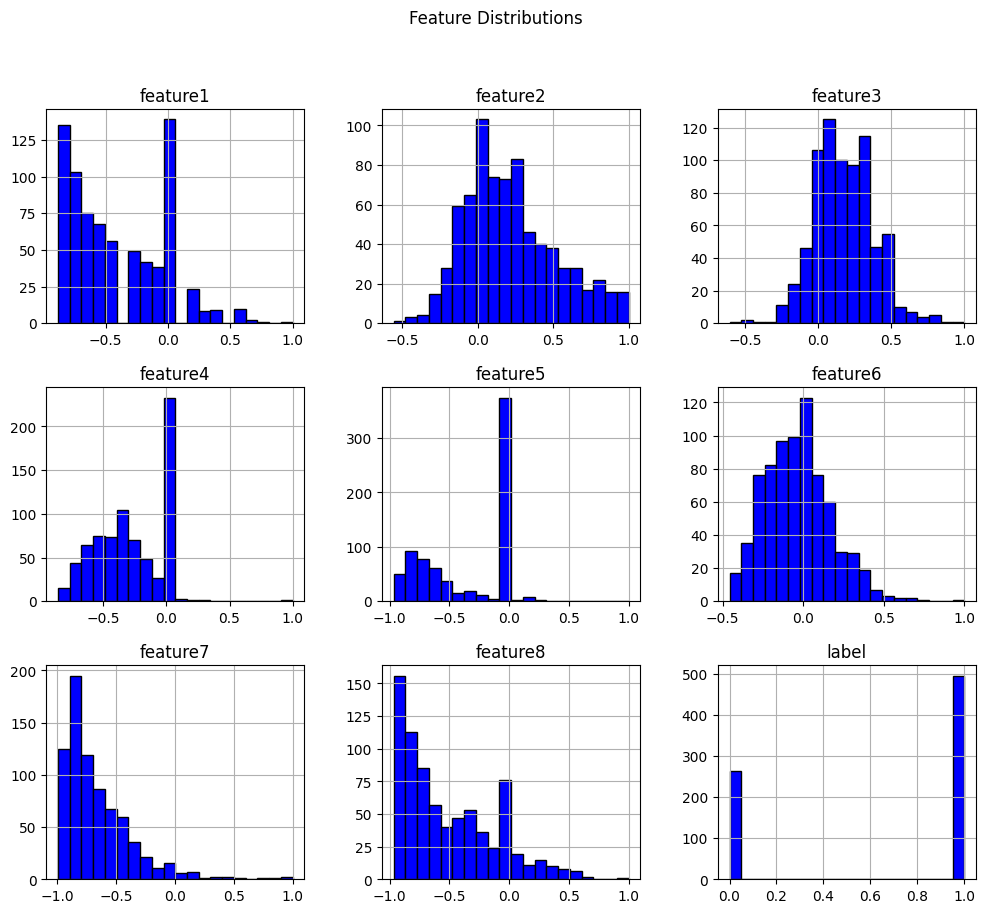

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms
plt.figure(figsize=(10, 6))
data.hist(bins=20, figsize=(12, 10), color='blue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()




We can get the value ditribution of each feature using Histograms



**Correlation Matrix**

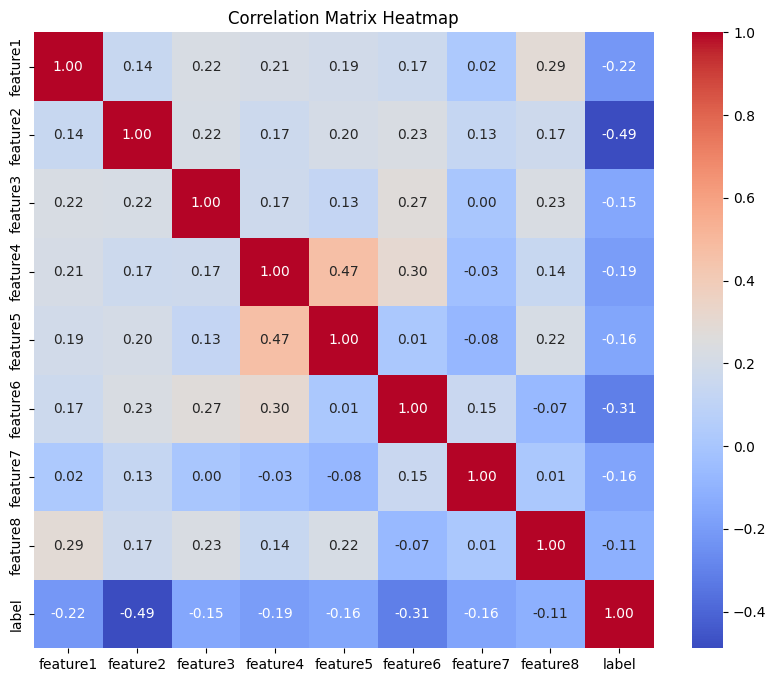

In [31]:
# 2. Correlation Matrix with Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap we can say that feature 4 and feature 5

**Box Plots**

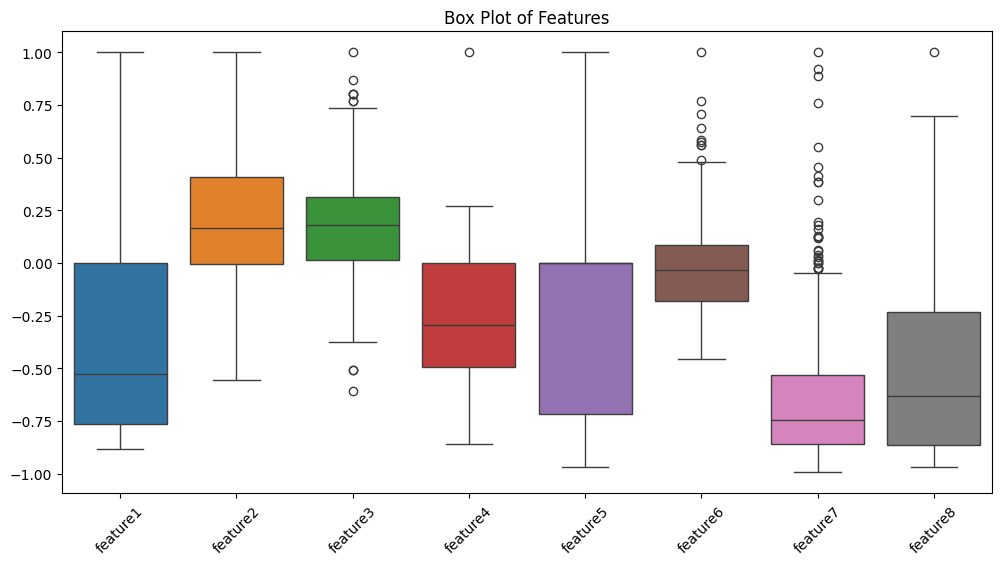

In [32]:
# 4. Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('label', axis=1))

plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

We can look at the outliers from this graph

In [33]:
# Calculate the number of outliers for each feature
def calculate_outliers(df):
    outlier_count = {}
    for column in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]

    return outlier_count


outlier_counts = calculate_outliers(data)
print("Number of Outliers for Each Feature:")
print(outlier_counts)



Number of Outliers for Each Feature:
{'feature1': 0, 'feature2': 0, 'feature3': 10, 'feature4': 1, 'feature5': 0, 'feature6': 9, 'feature7': 29, 'feature8': 1, 'label': 0}


Even though the data contains outliers, we will ignore this beacuse this is a medical dataset and we need to keep all the features as it is becuase we need information from all

## Splitting the Dataset into training and testing

In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [35]:

# Splitting Dataset

# Split the data into features (X) and label (y)
X = data.drop('label', axis=1)
y = data['label']

# Convert to PyTorch tensors
# Convert X and y to NumPy arrays before creating tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(torch.Size([531, 8]),
 torch.Size([228, 8]),
 torch.Size([531, 1]),
 torch.Size([228, 1]))

## Base Model

Modifications made in the demo code:
1. Using Binary cross entropy loss because this is a Binary Classification Problem
2. Have utilized the adam optimizer instead of SGD because it is recommended for small datasets and preferred in classification tasks
3. Defined shape as (8,1) because there are 8 features and one class label

In [36]:
linear_base_model = nn.Sequential(
    nn.Linear(8,1),

    )


In [37]:
# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss with Logits for better numerical stability
optimizer = torch.optim.SGD(linear_base_model.parameters(), lr=0.05)


In [38]:
# Training the Model
epochs = 3
for epoch in range(epochs):
    linear_base_model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = linear_base_model(X_train)

    # Compute the loss
    loss = criterion(outputs, y_train)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


In [39]:
# Evaluate the Model
linear_base_model.eval()  # Set the model to evaluation mode

# Predictions on the test set
with torch.no_grad():
    y_pred_test = linear_base_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Accuracy on Test Data: 58.33%


Our base model gave an accuracy of 58.33%, additional approaches to try out for better results.



#Hypothesis : Steps to Improve the Model

**1. Add More Layers to the Model:**
Introducing additional layers, can help the model learn more complex patterns in the data. More layers allow the model to create hierarchical representations, where deeper layers capture more abstract features.

**2. Use Activation Functions:**
Activation functions introduce non-linearity into the model, enabling it to learn more complex mappings from inputs to outputs. Without activation functions, the model would be limited to learning only linear relationships, regardless of the number of layers.

**3. Experiment with Different Batch Sizes and Number of Neurons in Layers:**
Varying the batch size can affect the model's learning dynamics. Smaller batch sizes may lead to faster convergence by introducing more noise into the gradient descent process, which can help escape local minima. However, larger batch sizes provide a more accurate estimate of the gradient, leading to more stable updates. Similarly, adjusting the number of neurons in each layer can impact the model’s capacity to learn. Too few neurons may limit the model's ability to capture patterns, while too many can lead to overfitting. Finding the right balance through experimentation is key to optimizing performance.

**4. Try Different Optimizers:**
The choice of optimizer can significantly influence the training efficiency and convergence speed of the model. Adam (Adaptive Moment Estimation) adjusts the learning rate dynamically for each parameter, which often results in faster and more stable convergence compared to traditional optimizers like Stochastic Gradient Descent (SGD).

**5. Experiment with Different Numbers of Epochs:**
The number of epochs determines how many times the learning algorithm will work through the entire training dataset. Too few epochs can lead to underfitting, where the model hasn’t learned enough from the data, while too many epochs can cause overfitting, where the model learns noise and details that do not generalize well to unseen data. Experimenting with different numbers of epochs helps you find the optimal stopping point where the model achieves the best performance on both training and validation data.

## Model with Activation function


Modifications made in the demo code:
1. Using Binary cross entropy loss because this is a Binary Classification Problem
3. Defined shape as (8,1) because there are 8 features and one class label

In [40]:
wide_model = nn.Sequential(
    nn.Linear(8,1),
    nn.Sigmoid()
    )


In [41]:
# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss with Logits for better numerical stability
optimizer = torch.optim.SGD(linear_base_model.parameters(), lr=0.05)  # SGD optimizer

In [42]:
# Training the Model
epochs = 3
for epoch in range(epochs):
    wide_model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = wide_model(X_train)

    # Compute the loss
    loss = criterion(outputs, y_train)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# Evaluate the Model
wide_model.eval()  # Set the model to evaluation mode

# Predictions on the test set
with torch.no_grad():
    y_pred_test = wide_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')


Accuracy on Test Data: 67.54%


Adding the sigmoid activation function significantly improves the performance

## Deeper Model

Modifications made in the demo code:

1. Using Binary cross entropy loss because this is a Binary Classification Problem

2. Defined shape as (8,1) because there are 8 features and one class label

In [57]:
Layer_model = nn.Sequential(
    nn.Linear(8,16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [44]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(3):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],32):
        indices = permutation[i:i+32]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')


1 loss: 0.6915073990821838
1 loss: 0.6862055063247681
1 loss: 0.6828032732009888
1 loss: 0.6701982021331787
1 loss: 0.6360849142074585
1 loss: 0.633183479309082
1 loss: 0.6313877105712891
1 loss: 0.6295981407165527
1 loss: 0.561823844909668
1 loss: 0.7018067240715027
1 loss: 0.5768548250198364
1 loss: 0.6916478872299194
1 loss: 0.6358832120895386
1 loss: 0.5778067708015442
1 loss: 0.5683584213256836
1 loss: 0.6756547093391418
1 loss: 0.46396732330322266
2 loss: 0.6148030757904053
2 loss: 0.5318564176559448
2 loss: 0.6072293519973755
2 loss: 0.6509467363357544
2 loss: 0.498548686504364
2 loss: 0.5677289962768555
2 loss: 0.5904144644737244
2 loss: 0.5484468936920166
2 loss: 0.5180490016937256
2 loss: 0.5845275521278381
2 loss: 0.41247811913490295
2 loss: 0.5315594673156738
2 loss: 0.4205368757247925
2 loss: 0.5064144134521484
2 loss: 0.5029141306877136
2 loss: 0.4915747046470642
2 loss: 0.6427806615829468
3 loss: 0.4114691913127899
3 loss: 0.37088626623153687
3 loss: 0.5173220038414001
3

In [45]:
Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Accuracy on Test Data: 73.25%


**Addition of a layer and use of the Relu activation function significantly improved the performance**

## Increasing the number of epochs

In [58]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],32):
        indices = permutation[i:i+32]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

1 loss: 0.7128690481185913
1 loss: 0.6939307451248169
1 loss: 0.6805900931358337
1 loss: 0.6703482866287231
1 loss: 0.6451126933097839
1 loss: 0.6796425580978394
1 loss: 0.6648269295692444
1 loss: 0.6103662252426147
1 loss: 0.646275520324707
1 loss: 0.6498194336891174
1 loss: 0.6322031021118164
1 loss: 0.6089145541191101
1 loss: 0.5635536313056946
1 loss: 0.6385166049003601
1 loss: 0.6210630536079407
1 loss: 0.703235387802124
1 loss: 0.6436894536018372
2 loss: 0.6258427500724792
2 loss: 0.5636920928955078
2 loss: 0.4810989797115326
2 loss: 0.49437540769577026
2 loss: 0.506654679775238
2 loss: 0.5723426938056946
2 loss: 0.5285574197769165
2 loss: 0.46594101190567017
2 loss: 0.6746785044670105
2 loss: 0.5713029503822327
2 loss: 0.5374055504798889
2 loss: 0.6695021390914917
2 loss: 0.5101107954978943
2 loss: 0.578998327255249
2 loss: 0.564304769039154
2 loss: 0.5576151609420776
2 loss: 0.7025327682495117
3 loss: 0.5841698050498962
3 loss: 0.4989531636238098
3 loss: 0.5411227941513062
3 lo

In [59]:
Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Accuracy on Test Data: 76.32%


As observed increasing the number of epochs from 3 to 10 improved the accuracy by 4%

## Now trying out a different batch size





In [60]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],8):
        indices = permutation[i:i+8]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        #print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Finished Training
Accuracy on Test Data: 75.00%


In [61]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],16):
        indices = permutation[i:i+16]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        #print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Finished Training
Accuracy on Test Data: 74.12%


SInce there is not much difference in the accuracies on changine the batch size we will stick to 32

## Now trying out differnt inputs and output sizes in the layer_model with a batch size of 32 and trained on 10 epochs

In [62]:
hidden_layer=int(input("Enter the number of neurons in the input to the hidden layer: "))
output_layer=int(input("Enter the number of neurons as the input to the output layer: "))

Layer_model = nn.Sequential(
    nn.Linear(8,hidden_layer),
    nn.ReLU(),
    nn.Linear(hidden_layer,output_layer),
    nn.ReLU(),
    nn.Linear(output_layer,1)
)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],32):
        indices = permutation[i:i+32]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Enter the number of neurons in the input to the hidden layer: 16
Enter the number of neurons as the input to the output layer: 16
1 loss: 0.7103540897369385
1 loss: 0.7002646923065186
1 loss: 0.6812095642089844
1 loss: 0.6608777046203613
1 loss: 0.646291971206665
1 loss: 0.6150978803634644
1 loss: 0.6395556926727295
1 loss: 0.6773351430892944
1 loss: 0.5989682078361511
1 loss: 0.6271281242370605
1 loss: 0.7413914203643799
1 loss: 0.5932658910751343
1 loss: 0.4777086079120636
1 loss: 0.685452401638031
1 loss: 0.6347579956054688
1 loss: 0.5333077311515808
1 loss: 0.614998996257782
2 loss: 0.7693858742713928
2 loss: 0.7380099296569824
2 loss: 0.6394249200820923
2 loss: 0.5174188613891602
2 loss: 0.5454183220863342
2 loss: 0.4731650948524475
2 loss: 0.549468994140625
2 loss: 0.6501669883728027
2 loss: 0.5315612554550171
2 loss: 0.48536616563796997
2 loss: 0.5098770260810852
2 loss: 0.5064722299575806
2 loss: 0.4897461235523224
2 loss: 0.7551526427268982
2 loss: 0.5722200274467468
2 loss: 0

In [63]:
hidden_layer=int(input("Enter the number of neurons in the input to the hidden layer: "))
output_layer=int(input("Enter the number of neurons as the input to the output layer: "))

Layer_model = nn.Sequential(
    nn.Linear(8,hidden_layer),
    nn.ReLU(),
    nn.Linear(hidden_layer,output_layer),
    nn.ReLU(),
    nn.Linear(output_layer,1)
)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],32):
        indices = permutation[i:i+32]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Enter the number of neurons in the input to the hidden layer: 8
Enter the number of neurons as the input to the output layer: 8
1 loss: 0.7188171148300171
1 loss: 0.7350533604621887
1 loss: 0.7084634304046631
1 loss: 0.7089179754257202
1 loss: 0.6941509246826172
1 loss: 0.707177996635437
1 loss: 0.7040790319442749
1 loss: 0.6936321258544922
1 loss: 0.693241536617279
1 loss: 0.6863775253295898
1 loss: 0.6783737540245056
1 loss: 0.6683213114738464
1 loss: 0.6703023314476013
1 loss: 0.6766383051872253
1 loss: 0.6718149185180664
1 loss: 0.6082290410995483
1 loss: 0.6152514815330505
2 loss: 0.6206798553466797
2 loss: 0.6117014288902283
2 loss: 0.6533169746398926
2 loss: 0.629032552242279
2 loss: 0.6354389190673828
2 loss: 0.5629732608795166
2 loss: 0.6322906613349915
2 loss: 0.6613017320632935
2 loss: 0.6171683073043823
2 loss: 0.6255400776863098
2 loss: 0.5485982894897461
2 loss: 0.6129229068756104
2 loss: 0.5492844581604004
2 loss: 0.7247339487075806
2 loss: 0.622868537902832
2 loss: 0.50

In [52]:
hidden_layer=int(input("Enter the number of neurons in the input to the hidden layer: "))
output_layer=int(input("Enter the number of neurons as the input to the output layer: "))

Layer_model = nn.Sequential(
    nn.Linear(8,hidden_layer),
    nn.ReLU(),
    nn.Linear(hidden_layer,output_layer),
    nn.ReLU(),
    nn.Linear(output_layer,1)
)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(Layer_model.parameters(), lr=0.01)


for epoch in range(10):

  permutation = torch.randperm(X_train.size()[0])
  for i in range(0,X_train.shape[0],32):
        indices = permutation[i:i+32]

        X = X_train[indices]
        y_true = y_train[indices]

        optimizer.zero_grad()


        y_pred = Layer_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')

Layer_model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    y_pred_test = Layer_model(X_test)
    y_pred_test = torch.sigmoid(y_pred_test)  # Apply sigmoid to convert logits to probabilities
    y_pred_test = (y_pred_test >= 0.5).float()  # Convert probabilities to binary predictions

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')

Enter the number of neurons in the input to the hidden layer: 8
Enter the number of neurons as the input to the output layer: 16
1 loss: 0.6720054745674133
1 loss: 0.6668198108673096
1 loss: 0.6442569494247437
1 loss: 0.623470664024353
1 loss: 0.6642541885375977
1 loss: 0.6418373584747314
1 loss: 0.7194175124168396
1 loss: 0.6431779861450195
1 loss: 0.6458821296691895
1 loss: 0.6276465654373169
1 loss: 0.626232385635376
1 loss: 0.5957129001617432
1 loss: 0.6450873613357544
1 loss: 0.7406519055366516
1 loss: 0.659060537815094
1 loss: 0.6087931990623474
1 loss: 0.5707114338874817
2 loss: 0.5730429291725159
2 loss: 0.6547479033470154
2 loss: 0.5762921571731567
2 loss: 0.6257465481758118
2 loss: 0.4977593421936035
2 loss: 0.6567112803459167
2 loss: 0.6349509954452515
2 loss: 0.488788902759552
2 loss: 0.5316051840782166
2 loss: 0.5540966987609863
2 loss: 0.5450652837753296
2 loss: 0.483938068151474
2 loss: 0.5501359105110168
2 loss: 0.5082522034645081
2 loss: 0.4504745602607727
2 loss: 0.62

On experimenting with differnt values we can say that the best case scenario is when the shape of the layers is set as:
Layer_model = nn.Sequential(
    nn.Linear(8,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1)
)



##Tested Hypothesis Summary:

**1. Add More Layers to the Model:**
Adding additional layers to the model significantly improved performance. The model was able to learn more complex patterns in the data, resulting in better accuracy.

**2. Use Activation Functions:**
Incorporating activation functions, particularly ReLU, made a positive difference. The use of ReLU helped introduce non-linearity, allowing the model to capture more complex relationships in the data effectively.

**3. Experiment with Different Batch Sizes and Number of Neurons in Layers:**
Varying the batch sizes did not have a noticeable impact on model performance. However, experimenting with different numbers of neurons and the configuration of the layers improved accuracy, suggesting that the model's capacity to learn complex patterns was enhanced by the right choice of layer structure.

**4. Try Different Optimizers:**
Using the Adam optimizer provided better results compared to other optimizers. Adam's ability to adapt learning rates for each parameter led to faster convergence and more stable training, resulting in higher accuracy.

**5. Experiment with Different Numbers of Epochs:**
Increasing the number of epochs to 10 yielded better results. This allowed the model more iterations to learn from the data without overfitting, striking a balance between underfitting and overfitting.